<center><img src=img/MScAI_brand.png width=70%></center>

# Scikit-Learn: Introduction

<img src=img/sklearn-logo.png width=20%> 

Scikit-Learn provides a wide variety of machine learning algorithms and utilities with a fairly uniform interface.

A useful resource is the Vanderplas *Python Data Science Handbook* 
https://jakevdp.github.io/PythonDataScienceHandbook/ and we will draw on this, referring to it as *PDSH*.

We'll start with **supervised learning**.


Vanderplas (PDSH) describes the core workflow for supervised learning in Scikit-Learn as: "import/instantiate/fit/predict" 

I would add another step:

* import
* instantiate
* fit
* **evaluate**
* predict

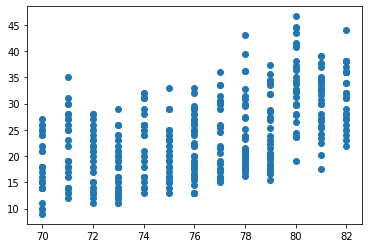

In [2]:
import numpy as np
import matplotlib.pyplot as plt
d = np.loadtxt("data/mpg_extract.csv", delimiter=",", 
               skiprows=1)
d[:5] # year, mpg
plt.scatter(d[:, 0], d[:, 1]);

* Independent variables: array of shape `(n_samples, n_variables)` 
* (even if `n_variables == 1`)
* Our dependent variable is typically of shape `(n_samples,)`.

In [3]:
X = d[:, 0:1]
y = d[:, 1]
X.shape, y.shape 

((398, 1), (398,))

### Make a train-test split

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

* Notice the order of the result -- very hard to remember!
* Notice a convention for uppercase `X` (a vector of variables) and lowercase `y` (a single variable)

### Import

In [5]:
from sklearn.linear_model import LinearRegression

### Instantiate

In [6]:
lr = LinearRegression()

### Fit

In [7]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Evaluate


In [8]:
lr.score(X_test, y_test)

0.38796002887551734

The result is an $R^2$ value, i.e. a coefficient of determination. Higher is better.

### Predict 

For an unknown `X`:

In [9]:
X_query = np.array([[83.]]) 
fX_query = lr.predict(X_query) 
fX_query

array([31.30689899])

Notice the result is of shape `(1,)`.

### Understanding the model

Look at the fitted parameters $a$ and $b_i$ (for $i \in $ `(0, n_vars-1)`).

In [10]:
a = lr.intercept_
B = lr.coef_
a, B 

(-63.18180027796002, array([1.13841806]))

### Visualise 

We'll look at our test data, newly-fitted model, and the query point.

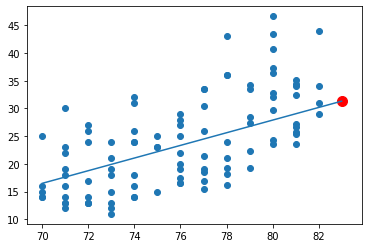

In [11]:
X_grid = np.linspace(70, 83, 14)
fX_grid = a + B * X_grid 
plt.scatter(X_test, y_test)
plt.plot(X_grid, fX_grid)
plt.scatter(X_query, fX_query, s=100, c="red");

Observe that this is *extrapolation*, not *interpolation*, i.e. we are trying to predict for a point which is "outside" the observed `X` (not just unseen).

### Summary

* get data
* train-test split
* import
* instantiate
* fit on training data
* look at model parameters
* evaluate on test data
* visualise
* **query on new data**

### Pandas instead of Numpy

We can pass in a Pandas `DataFrame` as `X`

In [12]:
import pandas as pd
df = pd.read_csv("data/mpg_extract.csv", 
                 names=["year", "mpg"], skiprows=1)
X = df[["year"]]
y = df[["mpg"]]
X_train, X_test, y_train, y_test = train_test_split(X, y)
lr.fit(X_train, y_train)
lr.predict([[85]]) # result is a Numpy array, not Pandas

array([[33.97513394]])

**Exercises**

1. Replace LinearRegression here with `DecisionTreeRegressor`. Is $R^2$ better?
2. Read in the dataset `data/titanic.csv`. Set `X` to be the first three columns, and `y` to be the `survived` column. The goal is to predict `survived`. Use `sklearn.linear_model.LogisticRegression`, and follow the steps above for a train-test split and fit.

**Exercises**

3. Evaluate on the test set using `score`. What does the score value mean in classification? Which is better, high or low? Look it up if needed.
4. Predict whether the following (fictional) passenger would survive: Jack, age 20, travelling in 3rd class. Use `predict_proba` to predict also the *probability* of surviving.

**Solutions**

In [149]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
dt.score(X_test, y_test) # R^2

0.3610267988691396

In [127]:
df = pd.read_csv("data/titanic.csv")
df.head()

,pclass,sex_f0m1,age,survived
0,3,1,22.0,0
1,1,0,38.0,1
2,3,0,26.0,1
3,1,0,35.0,1
4,3,1,35.0,0


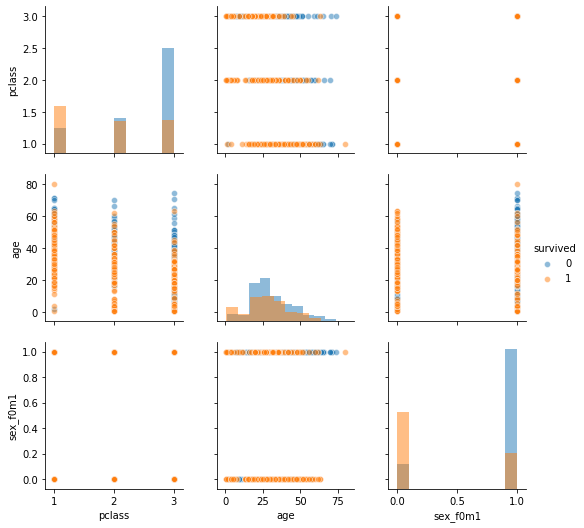

In [143]:
import seaborn as sns
# the pairplot is not perfect for discrete vars
# but still useful. several extra args to improve appearance
sns.pairplot(df, vars=["pclass", "age", "sex_f0m1"], 
             diag_kind="hist",
             hue="survived", 
             plot_kws={"alpha": 0.5},
             diag_kws={"alpha": 0.5}
            );

In [134]:
X = df[["pclass", "age", "sex_f0m1"]]
y = df["survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [136]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()

In [137]:
logr.fit(X_train, y_train, solver="lbfgs")

/home/jmmcd/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [138]:
logr.score(X_test, y_test)

0.8100558659217877

`help(logr.score)` -> percentage accuracy, so higher is better, so 81% is pretty good.

In [145]:
jack = np.array([[3, 20, 1]])
logr.predict(jack)

array([0])

In [146]:
logr.predict_proba(jack)

array([[0.85169886, 0.14830114]])

This means there is a 14.8% probability of surviving :-(